## Install



In [1]:
! pip install GPy gpyopt

     |████████████████████████████████| 1.0MB 5.0MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 71kB 5.1MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633915 sha256=ee48951745455818c7ecc4e694d30d516e7f8cb4ffa838a5a2df3ffb8bad17a3
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for gpyopt: filename=GPyOpt-1.2.6-cp36-none-any.whl size=83623 sha256=720921e96a9c04b6632a91097365fb9fcd0c75f0e8d8bd73615d7509945cb675
  Stored in directory: /root/.cache/pip/wheels/b2/00/69/cfa967a125cf25e66f644be6193ad6f0edf231147879ad714f
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102552 sha256=18aeedaf4cc4a2f588383fc8e13fe7badd5746e18b11976059ad892ca34d1c0c
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy gpyopt paramz


## Import main libs

In [2]:
%pylab inline  
import GPy
import GPyOpt
import numpy as np
from numpy.random import seed
seed(12354)

Populating the interactive namespace from numpy and matplotlib


## Some info about GPy lib

In [3]:
GPyOpt.methods.BayesianOptimization?

In [ ]:
GPy.kern.RBF?

In [ ]:
GPyOpt.models.GPModel?

## Main part

Using a model defined by the used.


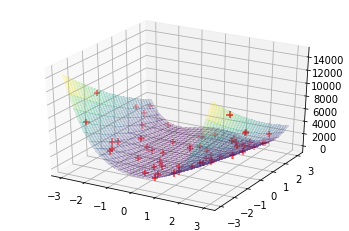

In [31]:
#bounds for our function
space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-3,3)},
        {'name': 'var_2', 'type': 'continuous', 'domain': (-3,3)}]
#constraints = [{'name': 'constr_1', 'constraint': '-x[:,1] -.5 + abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'},
              #{'name': 'constr_2', 'constraint': 'x[:,1] +.5 - abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'}]

# function we want to optimize
def Rosenbrock (x):
      x = x.reshape(-1,1)
      return (1-x[0])**2 + 100.0*(x[1] - x[0]**2)**2
      #return 4*x[0]**2 - 2.1*x[0]**4 + x[0]**6/3 + x[0]*x[1] - 4*x[1]**2 + 4*x[1]**4

#-----------------------------------------------------------
# Creation of the object that we will use to run BO.
seed(12345)
# BO object
kernel = GPy.kern.RBF(1, 1.5, 2)
model = GPyOpt.models.GPModel(optimize_restarts=3,exact_feval = True, verbose=True) #GP model without noize and with 3 restarts
#model.model = m

myBopt = GPyOpt.methods.BayesianOptimization(f = Rosenbrock,        # function to optimize       
                                             domain = space,        # box-constraints of the problem
                                             #constraints = constraints, we have no constrains
                                             model = model,
                                             initial_design_numdata = 60, #number of initial points
                                             initial_design_type = 'random',
                                             normalize_Y = False,
                                             verbosity = True,
                                             acquisition_type ='MPI') # acquisition = Expected improvement

#-----------------------------------------------------------
#greed for function
xx = np.arange(-3,3.1,0.1)

grid_x, grid_y = np.meshgrid(xx,xx)

surf = np.zeros((grid_x.shape[1], grid_x.shape[1]))
for i in range (grid_x.shape[1]):
  for j in range (grid_x.shape[1]):
     surf[i][j] = Rosenbrock(np.array([grid_x[i][j],grid_y[i][j]]))

#--------------------------------------------------------
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(myBopt.X[:,0],myBopt.X[:,1],myBopt.Y, color = 'red', s=40, marker = '+')
ax.plot_surface(grid_x, grid_y, surf, cmap=cm.viridis, linewidth=0, antialiased=False, alpha = 0.2)

fig.savefig('my_figure.png')
plt.show()

## BO Optimization

In [32]:
# Run the optimization (may take a few senconds)

myBopt.run_optimization(25)   # run optimization 

Optimization restart 1/3, f = 571.8815753716982
Optimization restart 2/3, f = 576.0120248404401
Optimization restart 3/3, f = 419.2760575662252
Optimization restart 1/3, f = 426.1942114299962
Optimization restart 2/3, f = 581.2848563625273
Optimization restart 3/3, f = 426.38462964934416
Optimization restart 1/3, f = 430.7899528842149
Optimization restart 2/3, f = 591.0082962158712
Optimization restart 3/3, f = 435.689631910246
Optimization restart 1/3, f = 436.405612609385
Optimization restart 2/3, f = 433.13729077447346
Optimization restart 3/3, f = 484.7127215194494
Optimization restart 1/3, f = 439.24932961657186
Optimization restart 2/3, f = 442.640650395372
Optimization restart 3/3, f = 622.9603650624125
Optimization restart 1/3, f = 444.3396819355925
Optimization restart 2/3, f = 449.39105737623606
Optimization restart 3/3, f = 619.3749875197782
Optimization restart 1/3, f = 448.85167672248963
Optimization restart 2/3, f = 480.0539594281384
Optimization restart 3/3, f = 452.6009

In [33]:
# resulting model after BO optimization
myBopt.model.model

GP_regression.,value,constraints,priors
Mat52.variance,918132876.3270549,+ve,
Mat52.lengthscale,9.75057723949825,+ve,
Gaussian_noise.variance,1e-06,+ve fixed,


## Plots

The first plot shows the distance between the last two collected observations at each iteration. This plot is useful to evaluate the convergence of the method. The second plot shows the best found value at each iteration. It is useful to compare different methods. The fastest the curve decreases the best is the method. 

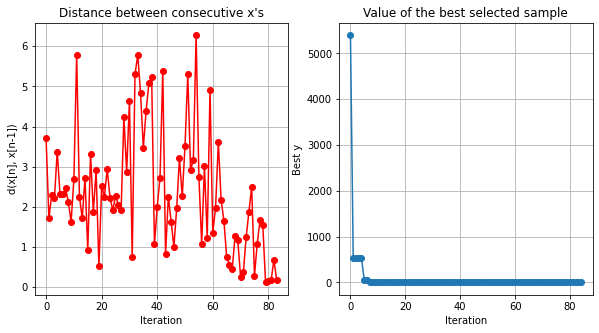

In [34]:

myBopt.plot_convergence()

Optimization restart 1/3, f = 490.83822015708756
Optimization restart 2/3, f = 497.39570181867066
Optimization restart 3/3, f = 505.6719052016357


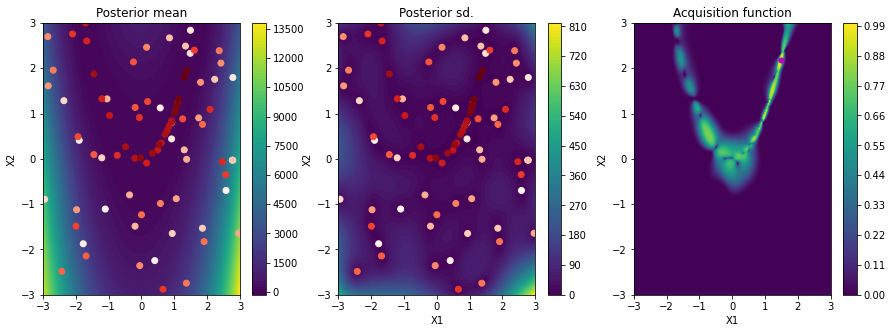

In [35]:
myBopt.plot_acquisition()

## Result of optimization

In [36]:
np.round(myBopt.x_opt,2)

array([1.01, 1.02])